# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DATA_PATH = Path('../data/')

## Options

In [3]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)

In [4]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [5]:
with open(DATA_PATH/'input_pipe.pkl', 'rb') as fin:
    input_pipe = pickle.load(fin)

In [6]:
train_fy = FoldYielder(h5py.File(DATA_PATH/'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 17.169s 


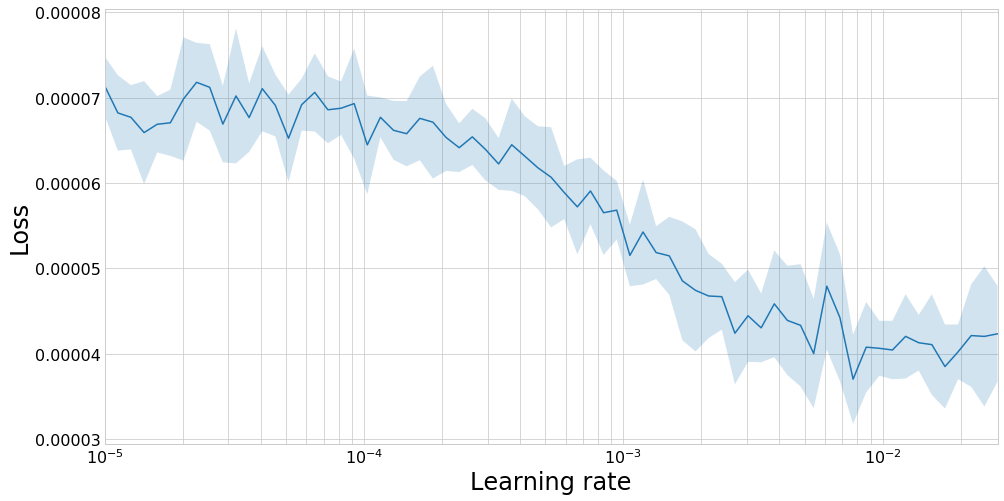

______________________________________



In [7]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [8]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.246462). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123615). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7061710105626843e-05
2 New best found: 3.461578711285256e-05
3 New best found: 3.417887553514447e-05
4 New best found: 3.3653146993310656e-05
5 New best found: 3.340873547422234e-05
6 New best found: 3.3039609962725084e-05
7 New best found: 3.2816743248258714e-05
11 New best found: 3.2412978885986376e-05
12 New best found: 3.2197010589879936e-05
13 New best found: 3.21666914576781e-05
14 New best found: 3.205880394525593e-05
23 New best found: 3.186658932681894e-05
25 New best found: 3.1807119328004775e-05
26 New best found: 3.1670249621674886e-05
27 New best found: 3.163960701203905e-05
28 New best found: 3.153765289025614e-05
29 New best found: 3.1487572081096e-05
47 New best found: 3.144232342456235e-05
54 New best found: 3.1404990423470735e-05
55 New best found: 3.13800341784372e-05
56 New best found: 3.136363613593858e-05
58 New best found: 3.1306403972848786e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=0.00011866523563337172
128 New b

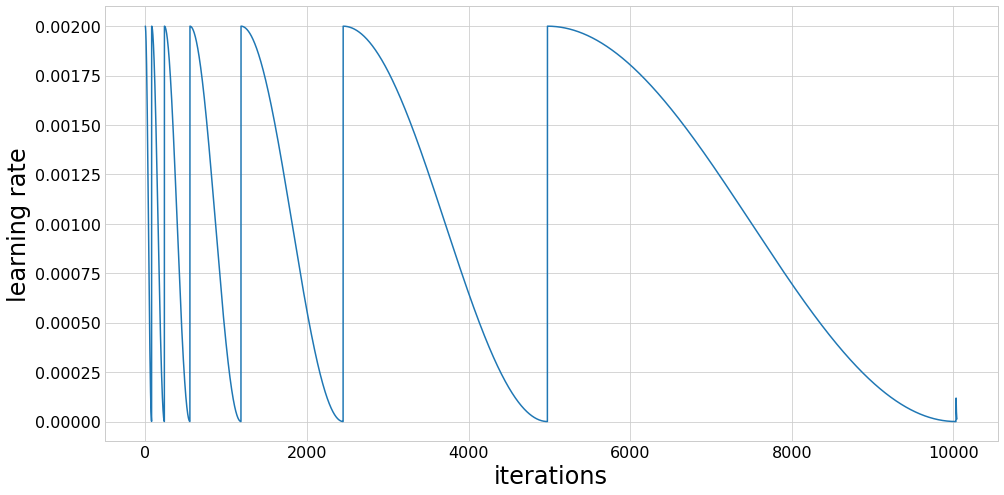

Fold took 138.733s

Training model 2 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.252091). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126387). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8673397961372034e-05
2 New best found: 3.580768988510465e-05
3 New best found: 3.5111428227428584e-05
4 New best found: 3.490791931349971e-05
5 New best found: 3.410823289862833e-05
6 New best found: 3.3663248017938916e-05
7 New best found: 3.354853366121712e-05
9 New best found: 3.337739908867675e-05
11 New best found: 3.337394981944686e-05
12 New best found: 3.3189147154699305e-05
13 New best found: 3.2997689727724054e-05
14 New best found: 3.292639794105512e-05
15 New best found: 3.288989626022951e-05
24 New best found: 3.283841995492268e-05
25 New best found: 3.26367476219049e-05
26 New best found: 3.257142634083698e-05
27 New best found: 3.246280642766294e-05
28 New best found: 3.244197046250299e-05
29 New best found: 3.237980378911613e-05
30 New best found: 3.236999367456684e-05
49 New best found: 3.232516767683276e-05
54 New best found: 3.223968913166919e-05
56 New best found: 3.217795299321888e-05
58 New best found: 3.213342694791979e-05
CosineAnneal stallin

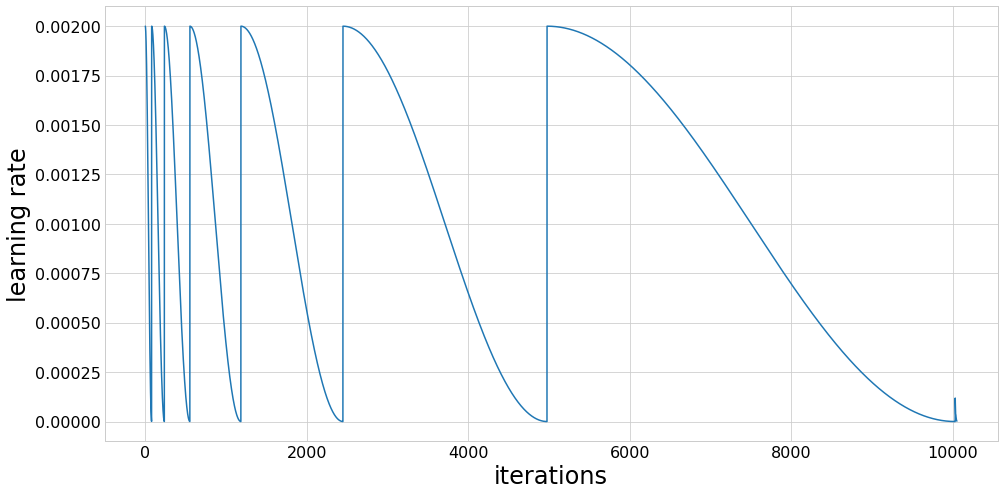

Fold took 150.527s

Training model 3 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.275489). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138118). Check your callbacks.
  % delta_t_median)


1 New best found: 3.814382714917883e-05
2 New best found: 3.508306531584822e-05
3 New best found: 3.418577304400969e-05
4 New best found: 3.413303055567667e-05
5 New best found: 3.3556984808819835e-05
6 New best found: 3.301855435274774e-05
11 New best found: 3.267603519343538e-05
13 New best found: 3.247430691844784e-05
14 New best found: 3.24515426022117e-05
15 New best found: 3.2375323123415e-05
23 New best found: 3.233382921171142e-05
24 New best found: 3.2318617531564083e-05
25 New best found: 3.230881247727666e-05
26 New best found: 3.219595539412694e-05
27 New best found: 3.2174599295831284e-05
28 New best found: 3.2095806085271764e-05
29 New best found: 3.207355010526953e-05
30 New best found: 3.2062934622808826e-05
48 New best found: 3.200790307600983e-05
51 New best found: 3.194270785461413e-05
56 New best found: 3.1872023725009054e-05
57 New best found: 3.18524169473676e-05
60 New best found: 3.184078234917251e-05
110 New best found: 3.182480455579935e-05
CosineAnneal stalli

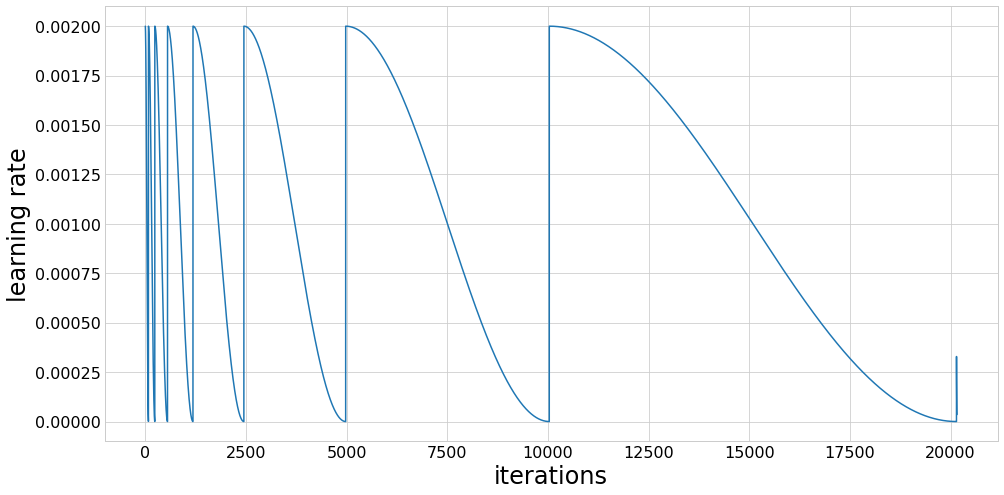

Fold took 273.388s

Training model 4 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.353257). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176918). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7456186589284376e-05
2 New best found: 3.494607150123735e-05
3 New best found: 3.444090539005868e-05
5 New best found: 3.416774173995973e-05
6 New best found: 3.3403261048537e-05
7 New best found: 3.331766285620139e-05
10 New best found: 3.3164108992811524e-05
12 New best found: 3.2922911233812474e-05
13 New best found: 3.266048427821112e-05
14 New best found: 3.26158554820562e-05
15 New best found: 3.260659425679807e-05
25 New best found: 3.2469787217242047e-05
28 New best found: 3.236194367303297e-05
29 New best found: 3.2302307569681173e-05
30 New best found: 3.2286416088122306e-05
31 New best found: 3.228187532853144e-05
49 New best found: 3.223478839715146e-05
50 New best found: 3.219554296202435e-05
51 New best found: 3.215467083071118e-05
52 New best found: 3.214833040041918e-05
55 New best found: 3.211698646409485e-05
56 New best found: 3.207065641819817e-05
57 New best found: 3.2010234794808426e-05
111 New best found: 3.198187454113685e-05
CosineAnneal stal

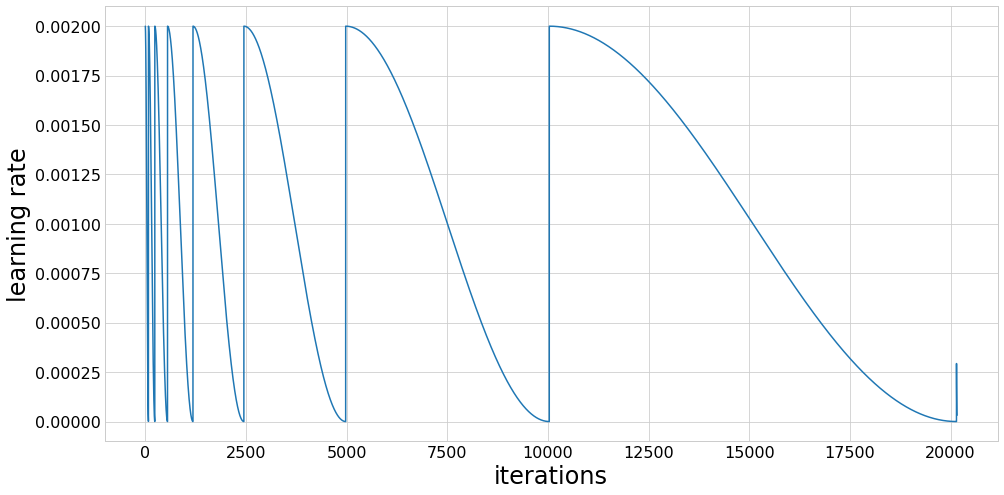

Fold took 278.922s

Training model 5 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.337457). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169146). Check your callbacks.
  % delta_t_median)


1 New best found: 3.852600842656102e-05
2 New best found: 3.527395889250329e-05
3 New best found: 3.433614072564524e-05
4 New best found: 3.430746205121977e-05
5 New best found: 3.417945853288984e-05
6 New best found: 3.297415995330084e-05
7 New best found: 3.2899116074258926e-05
11 New best found: 3.248346498876344e-05
12 New best found: 3.243354515725514e-05
13 New best found: 3.217694263294106e-05
14 New best found: 3.207224184152437e-05
15 New best found: 3.203450426663039e-05
24 New best found: 3.195184381038416e-05
25 New best found: 3.193883548083249e-05
26 New best found: 3.1929258570744425e-05
27 New best found: 3.180674754548818e-05
28 New best found: 3.178837716404814e-05
29 New best found: 3.169148637825856e-05
47 New best found: 3.162431342061609e-05
58 New best found: 3.158419499959564e-05
59 New best found: 3.156024284398882e-05
60 New best found: 3.154554053908214e-05
61 New best found: 3.153766142713721e-05
62 New best found: 3.153631218447117e-05
CosineAnneal stalling

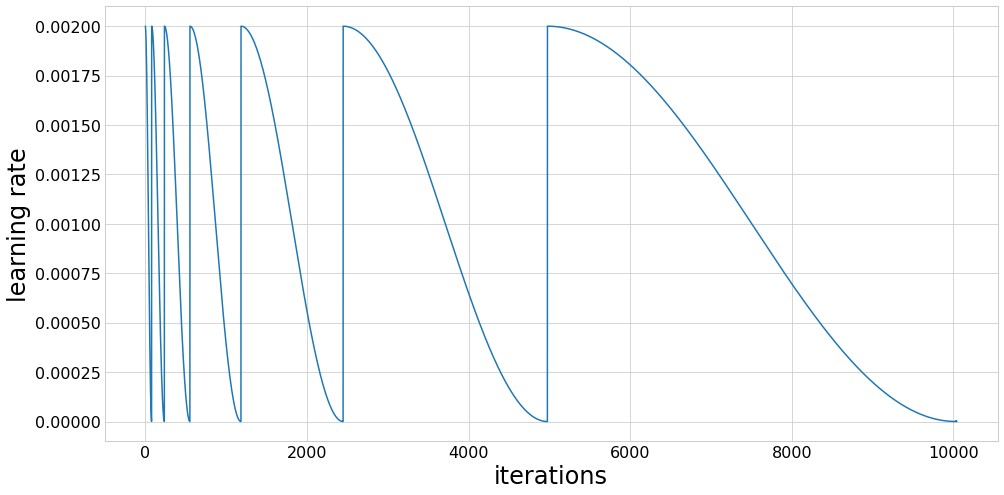

Fold took 150.824s

Training model 6 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.352443). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176576). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7711668293277005e-05
2 New best found: 3.451524572492463e-05
3 New best found: 3.37758606651523e-05
5 New best found: 3.288093486445248e-05
6 New best found: 3.2614642978441706e-05
7 New best found: 3.244773072807359e-05
11 New best found: 3.226707998626986e-05
12 New best found: 3.2162690284710544e-05
13 New best found: 3.209491847556166e-05
14 New best found: 3.1938759671431194e-05
15 New best found: 3.1916533455280496e-05
24 New best found: 3.1811763393113816e-05
25 New best found: 3.168711451921193e-05
26 New best found: 3.166487185166229e-05
27 New best found: 3.1649278058704854e-05
30 New best found: 3.1611244664194455e-05
31 New best found: 3.16057764040425e-05
47 New best found: 3.159356812627801e-05
51 New best found: 3.15171491589342e-05
52 New best found: 3.1437360179691686e-05
53 New best found: 3.1431203487486956e-05
54 New best found: 3.141575757775864e-05
57 New best found: 3.139731655804265e-05
59 New best found: 3.1378765514161755e-05
60 New best fo

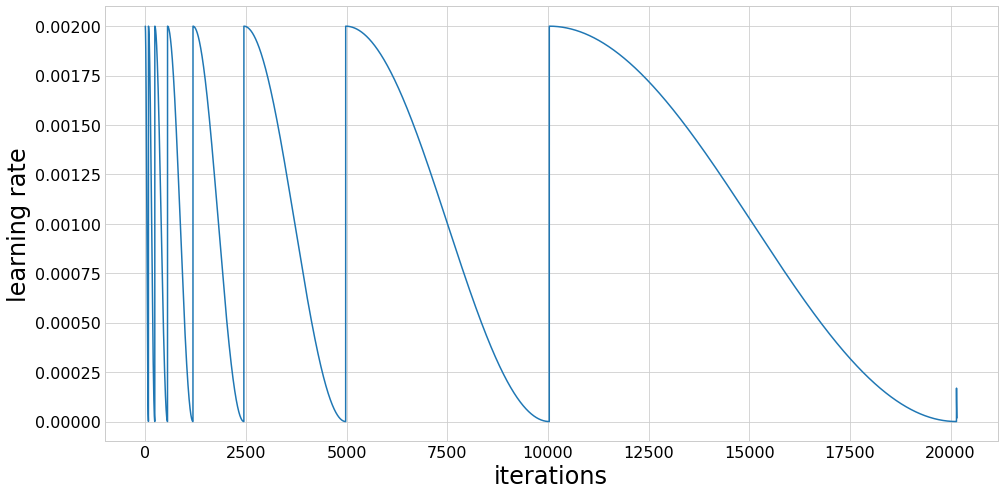

Fold took 284.958s

Training model 7 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.394382). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.197677). Check your callbacks.
  % delta_t_median)


1 New best found: 3.803720259190696e-05
2 New best found: 3.53676821129861e-05
3 New best found: 3.448728321450723e-05
5 New best found: 3.3598655356388826e-05
6 New best found: 3.3265114440104014e-05
7 New best found: 3.305187308620689e-05
12 New best found: 3.276239657916482e-05
14 New best found: 3.24373703749233e-05
15 New best found: 3.2406782764770985e-05
25 New best found: 3.2313226694328416e-05
26 New best found: 3.2292971994220214e-05
27 New best found: 3.224017270818994e-05
29 New best found: 3.2150758670059097e-05
54 New best found: 3.213472433112395e-05
56 New best found: 3.2001048784275584e-05
60 New best found: 3.1987760382322134e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=4.342114733391104e-05
128 New best found: 3.197375825207101e-05
Early stopping after 138 epochs
Score is: {'loss': 3.197375825207101e-05, 'wAUC': 0.06369558649521068, 'AUC': 0.09950835072915887, 'AMS': 3.70105354133833, 'cut': 0.9411962032318115}


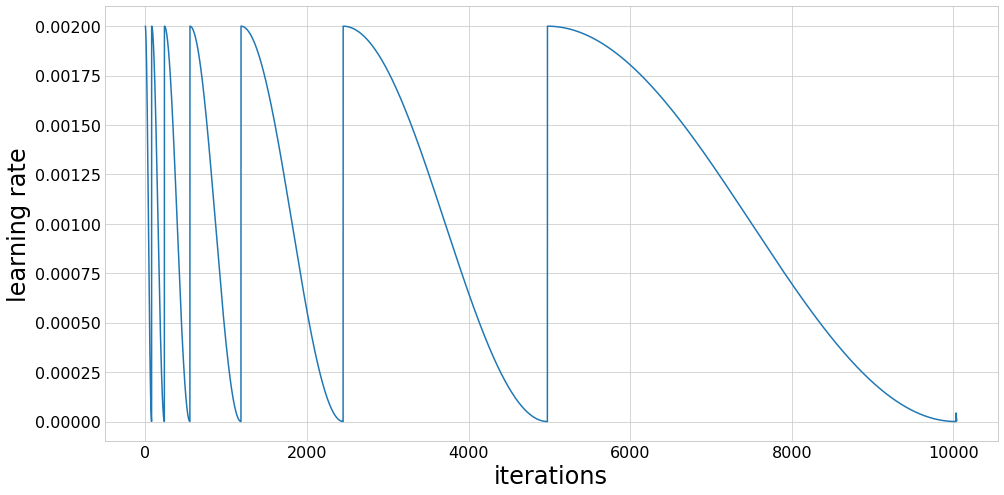

Fold took 152.373s

Training model 8 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.430938). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215882). Check your callbacks.
  % delta_t_median)


1 New best found: 3.82910886107842e-05
2 New best found: 3.4470330166406314e-05
3 New best found: 3.359202311075982e-05
4 New best found: 3.35330303114798e-05
5 New best found: 3.272378407560136e-05
6 New best found: 3.238193171730259e-05
7 New best found: 3.223234317838956e-05
10 New best found: 3.200731895928446e-05
11 New best found: 3.193693500167637e-05
12 New best found: 3.1826651283025005e-05
13 New best found: 3.157435698361237e-05
14 New best found: 3.156866978540631e-05
15 New best found: 3.153080657841502e-05
25 New best found: 3.151572671640599e-05
26 New best found: 3.1381311866757296e-05
28 New best found: 3.130820047210654e-05
29 New best found: 3.1253012308499645e-05
30 New best found: 3.121986570937975e-05
31 New best found: 3.121654687084918e-05
55 New best found: 3.118925586475075e-05
56 New best found: 3.1166433804281226e-05
57 New best found: 3.114281310113831e-05
58 New best found: 3.1137957257309136e-05
59 New best found: 3.107631814096496e-05
60 New best found: 

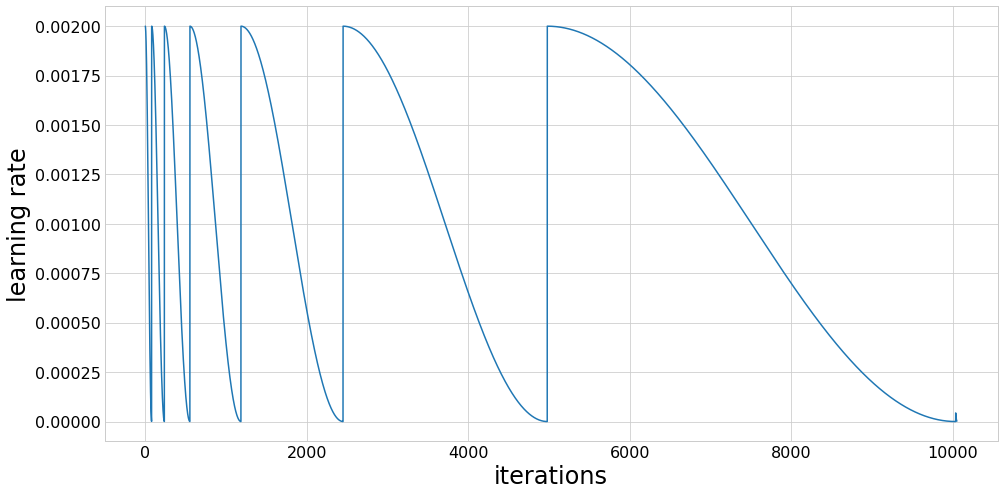

Fold took 156.392s

Training model 9 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.455250). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.228125). Check your callbacks.
  % delta_t_median)


1 New best found: 3.796234240031086e-05
2 New best found: 3.5267144277840454e-05
3 New best found: 3.486645926544126e-05
4 New best found: 3.4861784522515904e-05
5 New best found: 3.397855108164507e-05
6 New best found: 3.38044817291924e-05
7 New best found: 3.363254822298391e-05
10 New best found: 3.3234016313036866e-05
12 New best found: 3.3027919131774225e-05
13 New best found: 3.29058444116048e-05
14 New best found: 3.286037396373939e-05
15 New best found: 3.284917918425772e-05
21 New best found: 3.2791448145870705e-05
22 New best found: 3.269514627497751e-05
25 New best found: 3.269329842270208e-05
27 New best found: 3.265598434004467e-05
28 New best found: 3.248166753577856e-05
29 New best found: 3.242616741037582e-05
31 New best found: 3.242555222971243e-05
50 New best found: 3.235540464103796e-05
51 New best found: 3.235104320941994e-05
52 New best found: 3.227757377627843e-05
56 New best found: 3.221026329283522e-05
59 New best found: 3.218235667878264e-05
60 New best found: 3

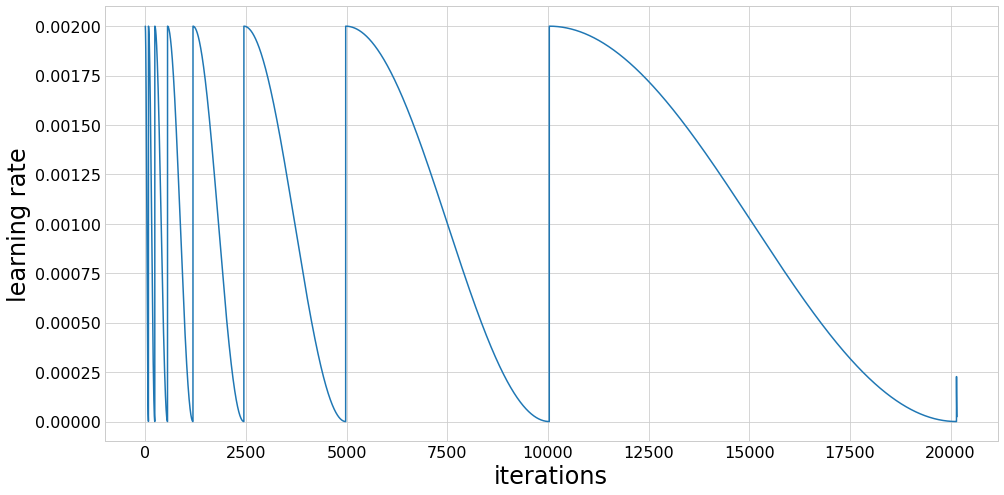

Fold took 295.027s

Training model 10 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.493626). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.247251). Check your callbacks.
  % delta_t_median)


1 New best found: 3.826143360347487e-05
2 New best found: 3.547231934062438e-05
3 New best found: 3.490925580044859e-05
4 New best found: 3.4260516923677644e-05
5 New best found: 3.38768780209648e-05
6 New best found: 3.361534148134524e-05
7 New best found: 3.333441094873706e-05
11 New best found: 3.320791599544464e-05
12 New best found: 3.283501444384456e-05
13 New best found: 3.268473804564564e-05
14 New best found: 3.268281684431713e-05
15 New best found: 3.2654063336667606e-05
21 New best found: 3.2531550934072584e-05
24 New best found: 3.2447076923563144e-05
25 New best found: 3.232363633724162e-05
27 New best found: 3.224850299957325e-05
29 New best found: 3.221399970861967e-05
30 New best found: 3.219931583516882e-05
31 New best found: 3.2192940039749377e-05
48 New best found: 3.210939811906428e-05
49 New best found: 3.2072144146150095e-05
54 New best found: 3.1976248400314945e-05
57 New best found: 3.19404658050189e-05
58 New best found: 3.1927671715675386e-05
102 New best foun

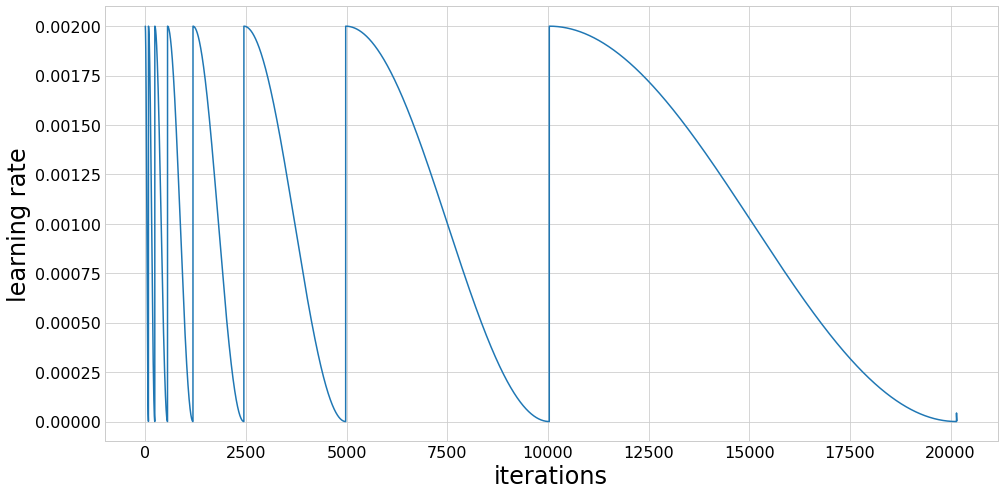

Fold took 294.733s


______________________________________
Training finished
Cross-validation took 2179.362s 


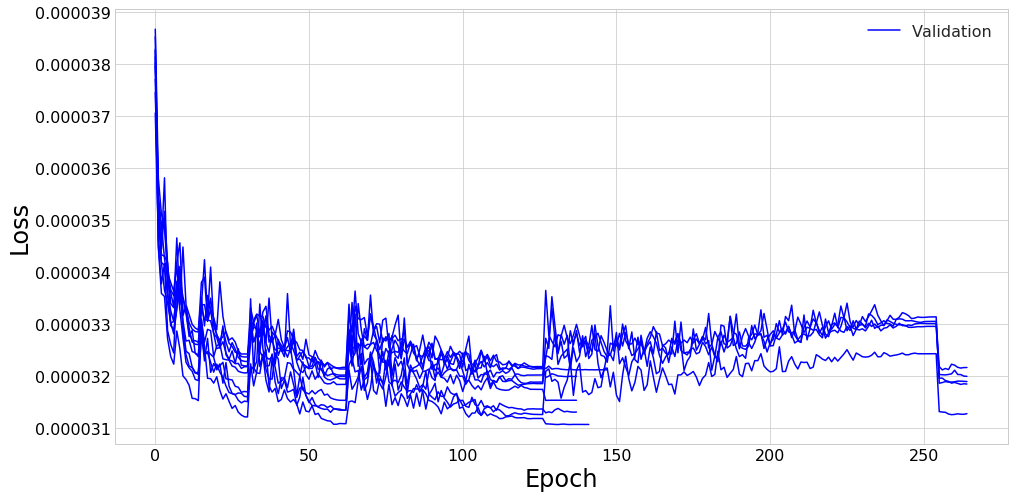

Mean loss = 3.17e-05 +- 1e-07
Mean wAUC = 0.063 +- 0.0005
Mean AUC = 0.0977 +- 0.0007
Mean AMS = 3.82 +- 0.04
Mean cut = 0.956 +- 0.004
______________________________________



<Figure size 432x288 with 0 Axes>

In [9]:
results, histories = fold_train_model(train_fy, n_models,
                                      model_gen_params=model_gen_params,
                                      train_params=train_params, train_on_weights=True,
                                      use_callbacks=use_callbacks, ams_args=ams_args,
                                      max_epochs=max_epochs, patience=patience,
                                      verbose=1, plots=plots)

The impact of data augmentation is pretty clear. Comparing the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [10]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [11]:
ensemble, weights = assemble_ensemble(results, ensemble_size, ensemble_mode, compile_args)

Choosing ensemble by loss
Model 0 is 7 with loss = 3.107107629737932e-05
Model 1 is 5 with loss = 3.12367652642307e-05
Model 2 is 0 with loss = 3.129659281403292e-05
Model 3 is 4 with loss = 3.153555077005876e-05
Model 4 is 2 with loss = 3.182480455579935e-05
Model 5 is 9 with loss = 3.1861931573803306e-05
Model 6 is 6 with loss = 3.197375825207101e-05
Model 7 is 3 with loss = 3.198187454113685e-05
Model 8 is 8 with loss = 3.211801725476868e-05
Model 9 is 1 with loss = 3.212118487036891e-05


## Response on validation data

In [12]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [13]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.002026521663367748s per sample

Predicting fold 2 out of 10
Prediction took 0.0003668056845664978s per sample

Predicting fold 3 out of 10
Prediction took 0.0003560036174952984s per sample

Predicting fold 4 out of 10
Prediction took 0.0003599744863808155s per sample

Predicting fold 5 out of 10
Prediction took 0.0003565650328993797s per sample

Predicting fold 6 out of 10
Prediction took 0.0003622861333191395s per sample

Predicting fold 7 out of 10
Prediction took 0.00036224211007356645s per sample

Predicting fold 8 out of 10
Prediction took 0.00034316530227661133s per sample

Predicting fold 9 out of 10
Prediction took 0.00032441281005740163s per sample

Predicting fold 10 out of 10
Prediction took 0.00033943698480725287s per sample



In [14]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

Testing ROC AUC: unweighted 0.9043859584493907, weighted 0.9362013193604695


In [15]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

50000 candidates loaded


(3.97699147432591, 0.96452177)

In [16]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

50000 candidates loaded

Mean calc_ams=4.0+-0.2, at mean cut of 0.964+-0.008
Exact mean cut 0.9639497548341751, corresponds to calc_ams of 3.964676010026209
CPU times: user 2.12 s, sys: 15.3 s, total: 17.4 s
Wall time: 2min 16s


(4.0, 0.964)

# Test scoring

In [17]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [18]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.00035606011138720946s per sample

Predicting fold 2 out of 10
Prediction took 0.00036331719654527576s per sample

Predicting fold 3 out of 10
Prediction took 0.00035419020490212873s per sample

Predicting fold 4 out of 10
Prediction took 0.00036401973597028036s per sample

Predicting fold 5 out of 10
Prediction took 0.0003638685637577014s per sample

Predicting fold 6 out of 10
Prediction took 0.00036333011442964727s per sample

Predicting fold 7 out of 10
Prediction took 0.000353605698116801s per sample

Predicting fold 8 out of 10
Prediction took 0.0003599110073663972s per sample

Predicting fold 9 out of 10
Prediction took 0.0003645255556160753s per sample

Predicting fold 10 out of 10
Prediction took 0.00036336987763643265s per sample

CPU times: user 3min 31s, sys: 19.1 s, total: 3min 50s
Wall time: 3min 18s


In [19]:
score_test_data(test_fy.source, 0.9639497548341751)

Public:Private AMS: 3.5436074274211253 : 3.7065525293805113


(3.5436074274211253, 3.7065525293805113)

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)